# Course: "Modeling of Turbulence and Combustion"

### "Investigation of a Turbulent Boundary Layer on a Flat Plate"

Stulov Ilya Sergeevich M8O-207M-23

**Initial Data:** 

The measurement results of the longitudinal velocity values depending on the distance to the flat plate u(y) – Table 1. Measurements were conducted using a Pitot tube, and the results are presented as readings of a millivoltmeter connected to a differential pressure sensor. The distances from the start of the plate to the coordinate of the profile measurement are 
x. The temperature T0 and pressure p0 of the incoming flow are also provided.

### 1) Using the calibration curve (Table 2), convert the readings from mV to m/s using linear interpolation.

In [130]:
import numpy as np
from scipy.interpolate import interp1d
import pandas as pd

# Distances to the wall in mm
y_measurements = np.array([0, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.6, 0.7, 0.8, 1, 1.5, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20]) / 1000
# Millivoltmeter readings
measurements_mv = np.array([800, 955, 959, 962, 970, 979, 988, 996, 1008, 1019, 1023, 1029, 1044, 1053, 1071, 1083, 1097, 1110, 1121, 1134, 1141, 1149, 1160, 1170, 1171, 1171, 1171])  # Example readings in mV
# Calibration dependency
# Readings in mV
calibration_mv = np.array([800, 805, 810, 815, 820, 825, 830, 835, 840, 850, 875, 895, 935, 985, 1025, 1070, 1120])  
# Speed in m/s
calibration_speed = np.array([0, 1.28, 1.81, 2.22, 2.56, 2.86, 3.13, 3.38, 3.62, 4.04, 4.95, 5.72, 7, 8.09, 9.04, 9.91, 10.69])  

# Linear interpolation
interp_func = interp1d(calibration_mv, calibration_speed, kind='linear', fill_value="extrapolate")

# Convert millivoltmeter readings to speed
speeds_ms = interp_func(measurements_mv)

# Mapping distance and speed
data = pd.DataFrame({
    'Distance to Wall (mm)': y_measurements,
    'Speed (m/s)': speeds_ms
})

# Output table
print(data)


    Distance to Wall (mm)  Speed (m/s)
0                 0.00000     0.000000
1                 0.00020     7.436000
2                 0.00025     7.523200
3                 0.00030     7.588600
4                 0.00035     7.763000
5                 0.00040     7.959200
6                 0.00045     8.161250
7                 0.00050     8.351250
8                 0.00060     8.636250
9                 0.00070     8.897500
10                0.00080     8.992500
11                0.00100     9.117333
12                0.00150     9.407333
13                0.00200     9.581333
14                0.00300     9.925600
15                0.00400    10.112800
16                0.00500    10.331200
17                0.00600    10.534000
18                0.00700    10.705600
19                0.00800    10.908400
20                0.00900    11.017600
21                0.01000    11.142400
22                0.01200    11.314000
23                0.01400    11.470000
24                0.01600

### 2) Determine the boundary layer thickness δ as the distance from the surface where the velocity is 0.99 of the undisturbed flow velocity u0.


In [131]:
# Determination of the undisturbed flow velocity u0, which is the maximum value from the measured data,
# as it usually corresponds to the velocity at some distance from the plate (where the boundary layer influence is minimal)
# it can be observed that this velocity becomes relatively constant
u0 = np.max(speeds_ms)
print(f"Undisturbed flow velocity: {u0} m/s")
# Determination of the boundary layer thickness δ
target_speed = 0.99 * u0
print(f"0.99 of the undisturbed flow velocity: {target_speed:.3f} m/s")
# Linear interpolation to find the distance y where the velocity equals target_speed
interp_func_y = interp1d(speeds_ms, y_measurements, kind='linear', fill_value="extrapolate")

# Finding the boundary layer thickness δ
delta = interp_func_y(target_speed)

print(f"Boundary layer thickness δ: {delta:.3f} m")


Undisturbed flow velocity: 11.485599999999998 m/s
0.99 of the undisturbed flow velocity: 11.371 m/s
Boundary layer thickness δ: 0.013 m


### 3) Plot the profile of relative velocity as a function of relative distance u/u0=f(y/δ).

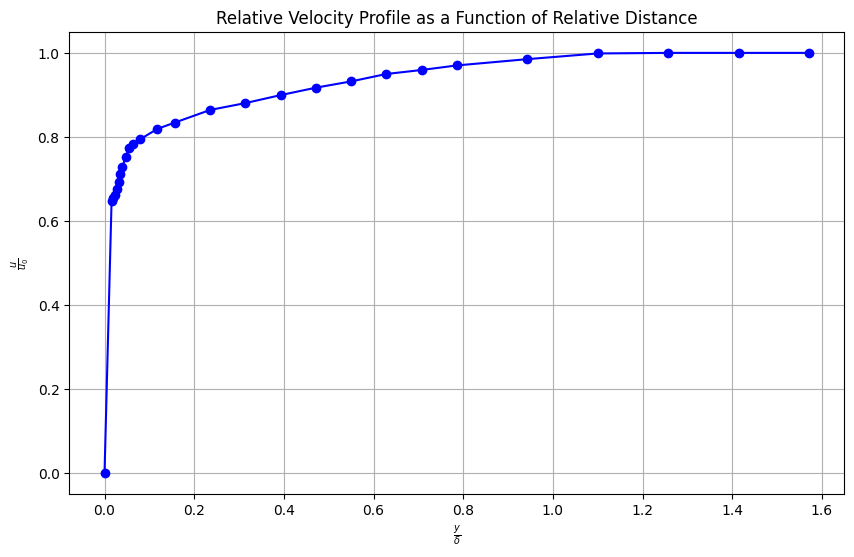

In [132]:
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
# Normalization of velocities and distances
u_normalized = speeds_ms / u0
y_normalized = y_measurements / delta

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(y_normalized, u_normalized, marker='o', linestyle='-', color='b')
plt.xlabel(r'$\frac{y}{\delta}$')
plt.ylabel(r'$\frac{u}{u_0}$')
plt.title('Relative Velocity Profile as a Function of Relative Distance')
plt.grid(True)
plt.show()


### 4) Approximate the obtained dependence with a power function u/u0=(y/δ)n. On the same graph, show the values from step 3 as points and the approximated dependence as a line, indicating the chosen value of n.

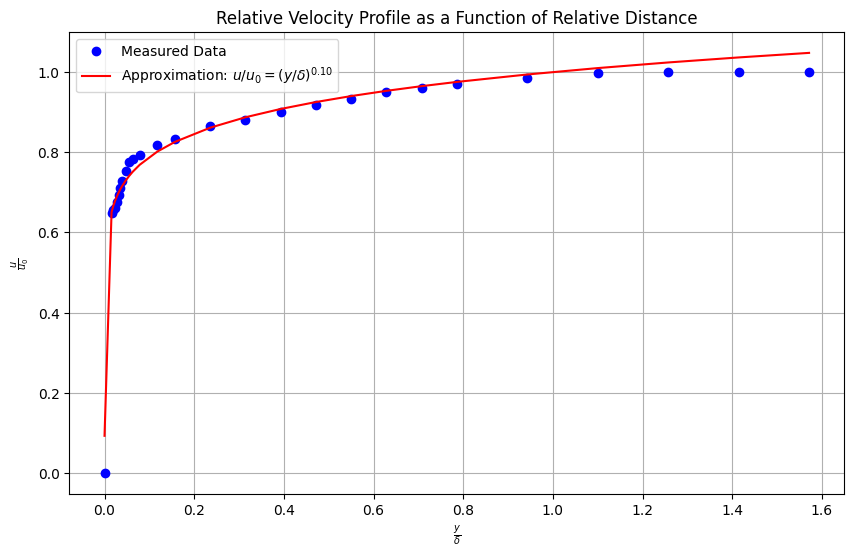

Value of n: 0.10


In [133]:
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
# Adding a small value to zero elements (to avoid errors when plotting the graph)
epsilon = 1e-10
u_normalized = np.where(u_normalized == 0, epsilon, u_normalized)
y_normalized = np.where(y_normalized == 0, epsilon, y_normalized)

# Function to fit the data
def power_law(x, n):
    return x**n

# Linear regression to find n (the curve_fit function is used to fit (approximate) data to a given function)
popt, _ = curve_fit(power_law, y_normalized, u_normalized)
n = popt[0]

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(y_normalized, u_normalized, marker='o', linestyle='', color='b', label='Measured Data')
plt.plot(y_normalized, power_law(y_normalized, n), linestyle='-', color='r', label=f'Approximation: $u/u_0 = (y/\\delta)^{{{n:.2f}}}$')
plt.xlabel(r'$\frac{y}{\delta}$')
plt.ylabel(r'$\frac{u}{u_0}$')
plt.title('Relative Velocity Profile as a Function of Relative Distance')
plt.legend()
plt.grid(True)
plt.show()

print(f"Value of n: {n:.2f}")


### 5) Calculate the displacement thickness:


 $$
\delta^{*} = \int_{0}^{\infty} \left(1 - \frac{u}{u_0}\right) dy ,	(1)
$$





and the momentum thickness:

$$
\delta^{**} = \int_{0}^{\infty} \left( 1 - \frac{u}{u_0} \right) \frac{u}{u_0} \, dy .	(2)
$$

The integrals (1) and (2) can be evaluated either by integrating the dependency obtained in step 4 or by numerical integration (e.g., using the trapezoidal rule) of the discrete profile.

Determine the shape factor.

 $$
H = \frac{\delta^{*}}{\delta^{**}}
$$
	.

In [134]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.integrate import trapezoid
# Numerical integration using the trapezoidal method
# Calculate the values of the integrand functions
integral1 = 1 - u_normalized
integral2 = u_normalized * (1 - u_normalized)
# Calculate the definite integral
delta_star = trapezoid(integral1, y_measurements)
delta_double_star = trapezoid(integral2, y_measurements)

# Determination of the shape factor H
H = delta_star / delta_double_star

print(f"Displacement thickness δ*: {delta_star:.4f}")
print(f"Momentum thickness δ**: {delta_double_star:.4f}")
print(f"Shape factor H: {H:.4f}")


Displacement thickness δ*: 0.0013
Momentum thickness δ**: 0.0010
Shape factor H: 1.2749


### 6) Determine the wall shear stress using the Clauser method (commonly used in the study of turbulent boundary layers).

To do this, a grid of curves is plotted in semi-logarithmic coordinates based on the following equation (see Fig. 1) for various values of uτ:

$$
u = 5.75 u_{\tau} \lg y + 5.75 u_{\tau} \lg \left( \frac{u_{\tau}}{v_0} \right) + 5.2 u_{\tau}
$$

which is derived from the universal equation describing the profile in the logarithmic region:

 $$ u^+ = 5.75 \lg y^+ + 5.2 $$
 
Here,  is the kinematic viscosity coefficient of air at T0 and p0 (determined from the table of air viscosity at various pressures and temperatures).

The experimental velocity profile is plotted on the graph with the curves (3), and the logarithmic region and the value of uτare determined based on the correspondence with the theoretical curves. Using the selected value of uτ , calculate the desired wall shear stress:
  $$ \tau_w = \rho u_\tau^2 $$

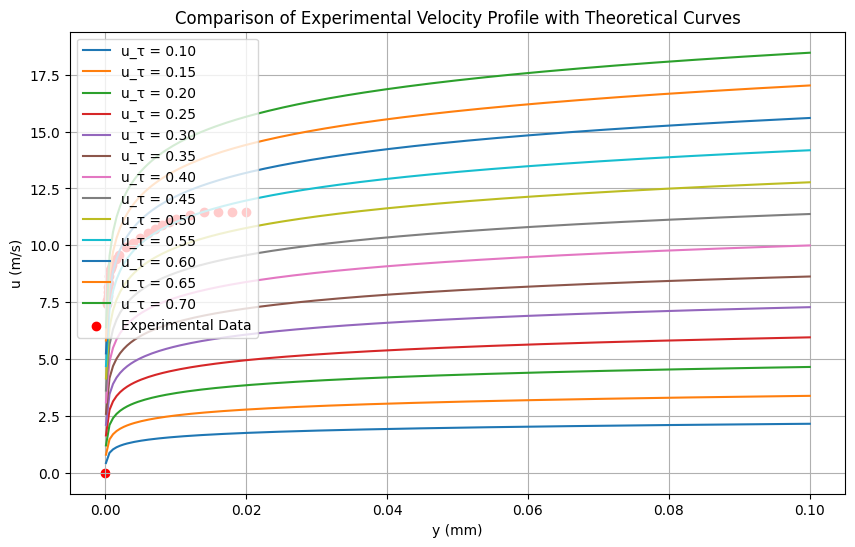

In [135]:
# Air parameters
T0 = 288  # Temperature in K
p0 = 101300  # Pressure in Pa
rho = 1.2272  # Air density in kg/m^3 (at T0 and p0)
nu_0 = 1.45e-5  # Kinematic viscosity of air in m^2/s (at T0 and p0)

# u_tau values for building the grid of curves
u_tau_values = np.linspace(0.1, 0.7, 13)  # Randomized u_tau values from 0.1 to 0.5 for 10 curves

# Building the grid of curves
plt.figure(figsize=(10, 6))
for u_tau in u_tau_values:
    y = np.linspace(0.0001, 0.1, 200)  # Range of y values
    u_theory = 5.75 * u_tau * np.log10(y) + 5.75 * u_tau * np.log10(u_tau / nu_0) + 5.2 * u_tau
    plt.plot(y, u_theory, label=f'u_τ = {u_tau:.2f}')

# Adding experimental data to the graph
plt.scatter(y_measurements, speeds_ms, color='red', label='Experimental Data')

plt.xlabel('y (mm)')
plt.ylabel('u (m/s)')
plt.title('Comparison of Experimental Velocity Profile with Theoretical Curves')
plt.legend()
plt.grid(True)
plt.show()


In [136]:
# Определение наилучшего значения u_tau (визуально)
u_tau_best = 0.55

# Определение напряжения трения на стенке
tau_w = rho * u_tau_best**2
print(f"Напряжение трения на стенке τ_w: {tau_w:.4f} Па")

Напряжение трения на стенке τ_w: 0.3712 Па


 ### 7) Plot the profile u+(y+), considering the dependencies:
$$
u^+ = \frac{u}{u_{\tau}}, \quad y^+ = \frac{y u_{\tau}}{\nu_0}
$$

Compare the obtained profile with the theoretical universal profile of the turbulent boundary layer.

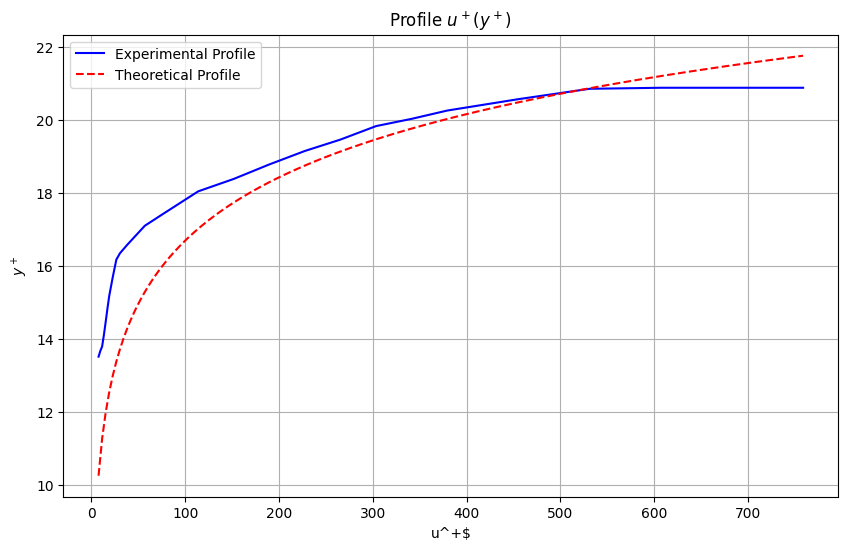

In [137]:
# Calculation of u+ and y+
u_plus = speeds_ms / u_tau_best
# Removing the first element to avoid errors in the logarithmic function
u_plus = u_plus[1:]
y_measurements = y_measurements[1:]
y_plus = y_measurements * u_tau_best / nu_0
# Theoretical profile
y_plus_theory = np.linspace(min(y_plus), max(y_plus), 200)   # Range of y+ values for the theoretical profile
u_plus_theory = 5.75 * np.log10(y_plus_theory) + 5.2  # Logarithmic region

# Plotting graphs
plt.figure(figsize=(10, 6))
plt.plot(y_plus, u_plus, label='Experimental Profile', color='blue')
plt.plot(y_plus_theory, u_plus_theory,  label='Theoretical Profile', color='red', linestyle='--')
plt.xlabel('u^+$')
plt.ylabel('$y^+$')
plt.title('Profile $u^+(y^+)$')
plt.legend()
plt.grid(True)
plt.show()


### 8) Determine the local friction coefficient and the Reynolds number calculated based on the longitudinal coordinate:


$$
C_f = \frac{\tau_w}{\frac{1}{2} \rho u_0^2}
$$

$$
\text{Re}_{x,0} = \frac{u_0 x}{\nu_0}
$$



In [138]:
x = 0.63
# Local friction coefficient
C_f = tau_w / (0.5 * rho * u0**2)

# Reynolds number
Re_x0 = (u0 * x) / nu_0

print(f"Local friction coefficient C_f: {C_f:.6f}")
print(f"Reynolds number Re_{{x,0}}: {Re_x0:.4f}")


Local friction coefficient C_f: 0.004586
Reynolds number Re_{x,0}: 499029.5172
